Here we follow the example to find epistemic and aleatoric uncertainty https://readmedium.com/my-deep-learning-model-says-sorry-i-dont-know-the-answer-that-s-absolutely-ok-50ffa562cb0b

### First example finding epistemic uncertainty

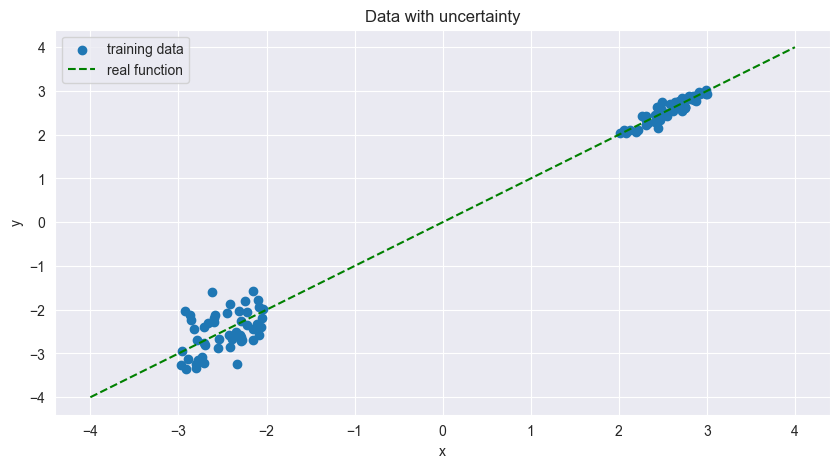

In [24]:
# Here we define the problem and create a plot

import numpy as np
import matplotlib.pyplot as plt

x_func = np.linspace(-4,4,100)
y_func = x_func

# define the left side with lower variance
x_train_left = np.random.uniform(-3,-2, 50)
y_train_left = x_train_left + np.random.randn(*x_train_left.shape)*0.5

# Now do same with rhs
x_train_right = np.random.uniform(2,3, 50)
y_train_right = x_train_right + np.random.randn(*x_train_left.shape)*0.1

x_train = np.concatenate((x_train_left, x_train_right))
y_train = np.concatenate((y_train_left, y_train_right))

x_test = np.linspace(-10,10,100)

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(x_train, y_train, label='training data')
ax.plot(x_func, y_func, ls='--', label='real function', color='green')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.set_title('Data with uncertainty');

Now we define our custom Neural networks, one with dropout 1 without.

The dropout randomly disables 5% on each pass

Also use L2 regularisers to control size of layer parameters

In [25]:
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import r2_score

def architecture(layers_shape, input_dim, output_dim, dropout_proba, reg, act="relu",verbose=0):
    """
    Function for creating a fully connected neural network
    The number of neurons in each layer is set by layers_shape
    The dropout probability is set by dropout_proba and indicates whether to use dropout

    Note that this is a quicker implementation than going through and defining classes however we do not have the same flexibility of defining our custom pass
    """

    inputs = Input(shape=(input_dim,)) # tells the model to expect inputs of this specified shape
    hidden = Dense(layers_shape[0], activation=act, kernel_regularizer=l2(reg))(inputs) # defines first hidden layer with l2 regulariser applied directly to the input

    # Loop over the remaining layers
    for l in range(1, len(layers_shape)):
        # if dropout_prob positive then we add a dropout layer before the next layer with desired prob
        if dropout_proba > 0:
            hidden = Dropout(dropout_proba)(hidden, training=True)
        # Add the next dense layer
        hidden = Dense(layers_shape[l], activation=act, kernel_regularizer=l2(reg))(hidden)

    # if dropout enabled add a final dropout before the output
    if dropout_proba > 0:
        hidden = Dropout(dropout_proba)(hidden, training=True)

    # Define output layer
    outputs = Dense(output_dim, kernel_regularizer=l2(reg))(hidden)
    model = Model(inputs=inputs, outputs=outputs)

    if verbose:
        model.summary()
    return model


# Now define our 2 models

model_without_dropout = architecture(layers_shape=[5,10,20,10,5], input_dim=1, output_dim=1, dropout_proba=0, reg=0, act="relu", verbose=1)

model_with_dropout = architecture(layers_shape=[5,10,20,10,5],input_dim=1, output_dim=1, dropout_proba=0.05, reg=0.00475, act="relu", verbose=1)



Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 5)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 561 (2.19 KB)

 Trainable params: 561 (2.19 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 5)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 561 (2.19 KB)

 Trainable params: 561 (2.19 KB)

 Non-trainable params: 0 (0.00 B)

Now we will compile and train our models

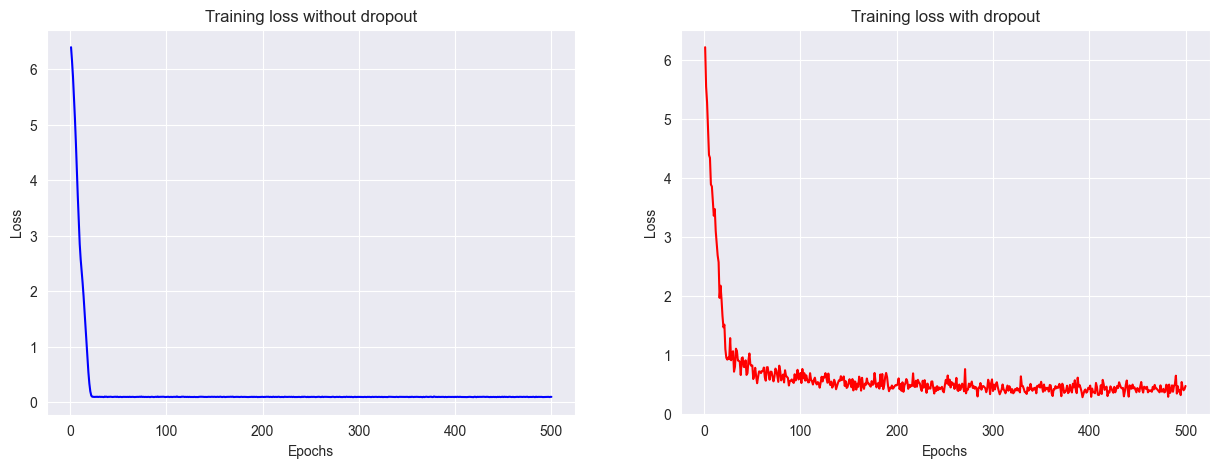

In [26]:
# training the network without dropout

model_without_dropout.compile(optimizer="rmsprop", loss="mse", metrics=["mae"]) # use rmsprop to minimiser mse
history_without_dropout = model_without_dropout.fit(x_train, y_train, batch_size=10,
                                                    epochs=500, shuffle=True, verbose=0)


# training the network with dropout
model_with_dropout.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history_with_dropout = model_with_dropout.fit(x_train, y_train, batch_size=10,
                                              epochs=500, shuffle=True, verbose=0)

# training performance
epochs = range(1, len(history_without_dropout.history['loss']) + 1)
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(epochs, history_without_dropout.history['loss'], 'b')
ax[0].set_title('Training loss without dropout')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[1].plot(epochs, history_with_dropout.history['loss'], 'r')
ax[1].set_title('Training loss with dropout')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss');



Can see a very smooth training loss for no dropout however with drop out its not smooth. This is because the dropout can cause us to skip past local minima and hence leads to the stochastic nature. In the next we plot the performance on test data

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


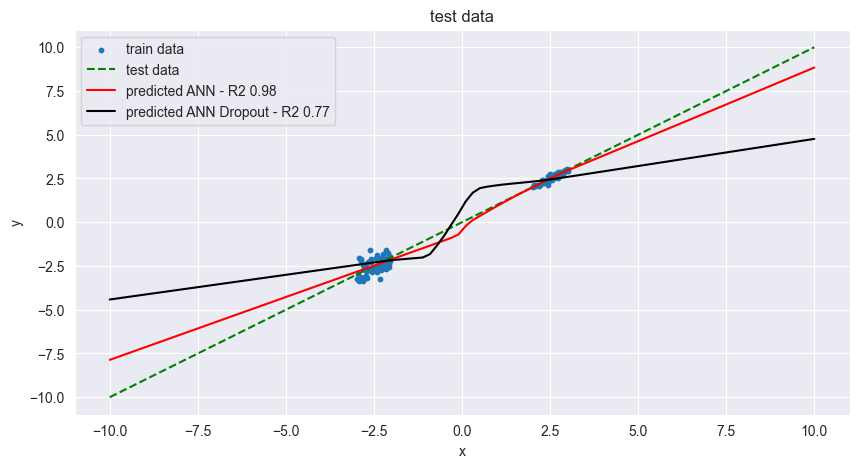

In [27]:
# prediction
y_pred_without_dropout = model_without_dropout.predict(x_test)
y_pred_with_dropout = model_with_dropout.predict(x_test)

# plotting
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(x_train, y_train, s=10, label='train data')
ax.plot(x_test, x_test, ls='--', label='test data', color='green')
ax.plot(x_test, y_pred_without_dropout, label='predicted ANN - R2 {:.2f}'.format(r2_score(x_test, y_pred_without_dropout)), color='red')
ax.plot(x_test, y_pred_with_dropout, label='predicted ANN Dropout - R2 {:.2f}'.format(r2_score(x_test, y_pred_with_dropout)), color='black')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.set_title('test data');

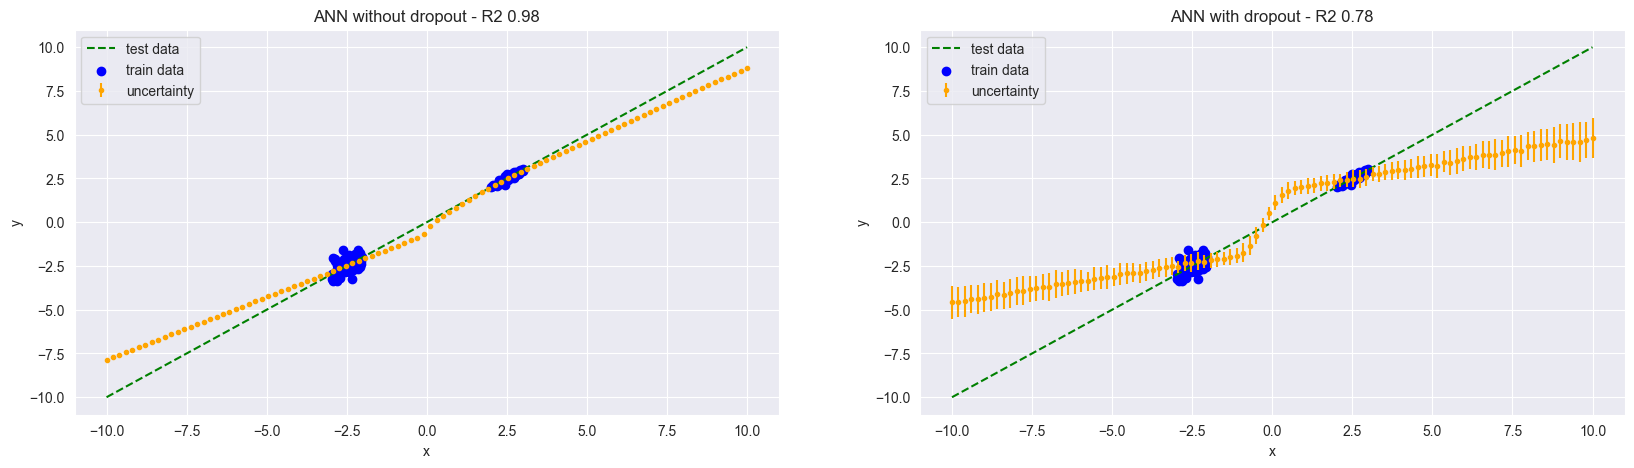

In [28]:
def predict_with_mc_dropout(model, X, n_iter=200):
    """
    Return mean and std of n_iter stochastic forward passes
    with dropout active at inference time.
    """
    preds = [model(X, training=True).numpy().squeeze() for _ in range(n_iter)]
    preds = np.stack(preds, axis=0)          # shape (n_iter, n_points)
    return preds.mean(0), preds.std(0)

def plot_epistemic_uncertainty(model, ax, title,
                     x_train=x_train, y_train=y_train,
                     x_test=np.linspace(-10,10,100), y_test=np.linspace(-10,10,100),
                     T=500):

  mean, std = predict_with_mc_dropout(model, x_test)
  ax.plot(x_test, y_test, ls='--', color='green', label='test data')
  ax.scatter(x_train, y_train, color='blue', label='train data')
  ax.errorbar(x_test, mean.flatten(), yerr=std.flatten(), fmt='.', color='orange', label='uncertainty')
  ax.set_title('{} - R2 {:.2f}'.format(title, r2_score(y_test, mean)))
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.legend()



fig, ax = plt.subplots(1,2,figsize=(20,5))
plot_epistemic_uncertainty(model_without_dropout, ax=ax[0], title='ANN without dropout')
plot_epistemic_uncertainty(model_with_dropout, ax=ax[1], title='ANN with dropout')


Can see that with no dropout there is no uncertainty, which makes sense since each time the model is run it returns the same thing.

With dropout we can see there is high epistemic uncertainty, seen by the large bars this makes sense since we have no training data there

### Polynomial example

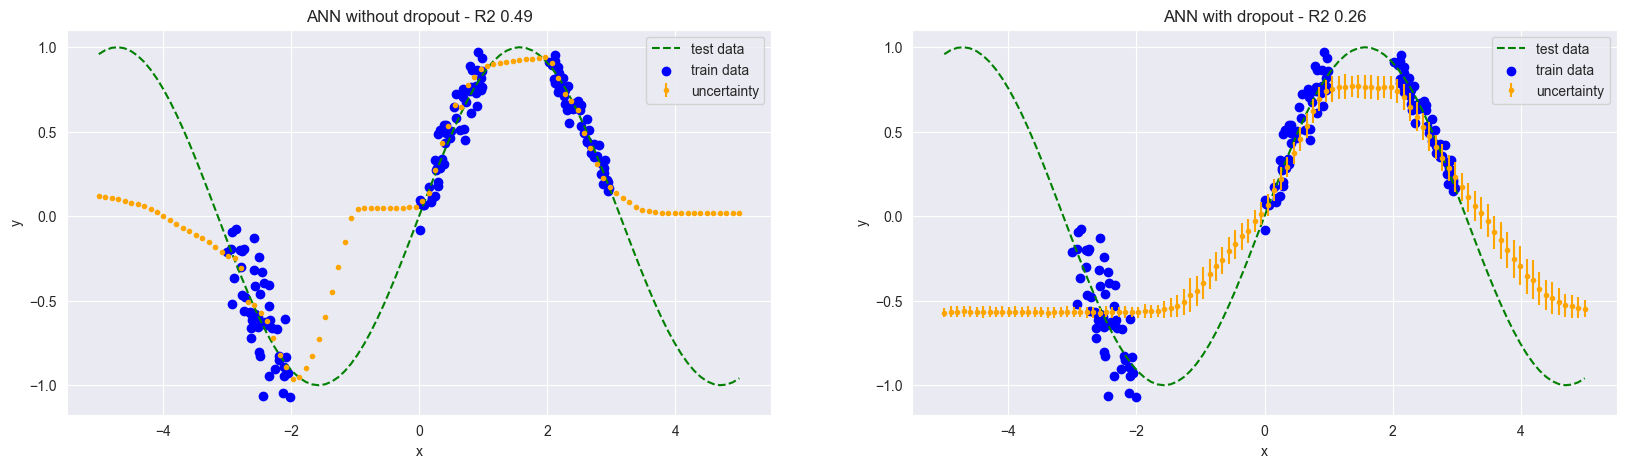

In [29]:

# generate synthetic polynomial data
x_func_poly = np.linspace(-5,5,100)
y_func_poly = lambda x: np.sin(x)
x_train_poly = np.random.uniform(-3, -2, 50)
y_train_poly = y_func_poly(x_train_poly) + np.random.normal(scale=.2, size=x_train_poly.shape)
x_train_poly = np.concatenate([x_train_poly, np.random.uniform(0, 1, 50)])
y_train_poly = np.concatenate([y_train_poly, y_func_poly(x_train_poly[50:])+np.random.normal(scale=.1, size=x_train_poly[50:].shape)])
x_train_poly = np.concatenate([x_train_poly, np.random.uniform(2, 3, 50)])
y_train_poly = np.concatenate([y_train_poly, y_func_poly(x_train_poly[100:])+np.random.normal(scale=.05, size=x_train_poly[100:].shape)])
x_test_poly = np.linspace(-5,5,100)
y_test_poly = y_func_poly(x_test_poly)

# creating networks
model_poly_without_dropout = architecture(layers_shape=[50,100,200,100,50], input_dim= 1, output_dim=1,
                               dropout_proba=0, reg=0, act='relu', verbose=0)
model_poly_with_dropout = architecture(layers_shape=[50,100,200,100,50], input_dim= 1, output_dim=1,
                               dropout_proba=0.05, reg=0.00475, act='relu', verbose=0)

# training the networks
model_poly_without_dropout.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model_poly_without_dropout.fit(x_train_poly, y_train_poly, batch_size=10, epochs=2000, shuffle=True, verbose=0)
model_poly_with_dropout.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model_poly_with_dropout.fit(x_train_poly, y_train_poly, batch_size=10, epochs=2000, shuffle=True, verbose=0)

# plotting epistemic uncertainty
fig, ax = plt.subplots(1,2,figsize=(20,5))
plot_epistemic_uncertainty(model_poly_without_dropout, ax=ax[0], title='ANN without dropout', x_train=x_train_poly, y_train=y_train_poly, x_test=x_test_poly, y_test=y_test_poly)
plot_epistemic_uncertainty(model_poly_with_dropout, ax=ax[1], title='ANN with dropout', x_train=x_train_poly, y_train=y_train_poly, x_test=x_test_poly, y_test=y_test_poly)


Can see again a similar story for this sinusoidal case and the uncertainty is higher in regions where there is no data. However we do see it has a slight affect on the model performance.

### Predicting aleatoric uncertainty

Captures our uncertainty from the information that the data cannot explain

When aleatoric uncertainty is constant then we call it homoscedastic uncertainty. Otherwise it is called heteroscedastic uncertainty.

Since heteroscedastic uncertainty depends on the input then it can be predicted as a model output.

Whereas homoscedastic uncertainty can be estimated using a task model parameter.

To learn the heteroscedastic uncertainty we can replace the MSE error in our training with

$$
L = \sum_{i=1}^{N} \frac{(y_i - \hat{y}_i)^2}{2N\sigma(x_i)^2} + \frac{1}{2} \log \sigma(x_i)^2
$$

(Page 37 of the Geometry and Uncertainty
in Deep Learning for Computer Vision Kendall Paper)


In [36]:
from tensorflow.keras import backend as K
import tensorflow as tf

# aleatoric loss function
def aleatoric_loss(y_true, y_pred):
    N = y_true.shape[0]
    se = K.pow((y_true[:,0]-y_pred[:,0]),2)
    inv_std = K.exp(-y_pred[:,1])
    mse = K.mean(inv_std*se)
    reg = K.mean(y_pred[:,1])
    return 0.5*(mse + reg)

In [31]:
# model with support for aleatoric uncertainty
# note output dimension is 2: y and std
model_with_dropout_aleatoric = architecture(layers_shape=[5,10,20,10,5],
                                            input_dim= 1, output_dim=2,
                                            dropout_proba=0, reg=0,
                                            act='relu', verbose=1)

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 5)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 2)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567 (2.21 KB)

 Trainable params: 567 (2.21 KB)

 Non-trainable params: 0 (0.00 B)

Note there is no dropout between layer between the hidden layers here and the network learns the response and also the variance $\sigma^2$

Now we will apply again to the linear problem

In [33]:
# reshape tensors to support two outputs
x_train_reshaped = x_train.reshape(x_train.shape[0], 1)
y_train_reshaped = np.vstack([y_train, np.zeros(y_train.shape)]).T

# training the network
model_with_dropout_aleatoric.compile(optimizer='rmsprop',
                                     loss=aleatoric_loss, metrics=['mae'])
model_with_dropout_aleatoric.fit(x_train_reshaped, y_train_reshaped,
                                 batch_size=10, epochs=1000, shuffle=True, verbose=1)


Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.3793 - mae: 1.3008  
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.1675 - mae: 1.3124
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8578 - mae: 1.2820
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7158 - mae: 1.3124
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4639 - mae: 1.3118
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 2.2193 - mae: 1.3028
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8934 - mae: 1.2202
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8000 - mae: 1.2954
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 1.4559 - mae: 1.2624
Epoch 10/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 1.1675 - mae: 1.1603
Epoch 11/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 1.0832 - mae: 1.2348
Epoch 12/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 0.9158 - mae: 1.1992
Epoch 13/1000

Now we can use this to predict and plot the uncertainty

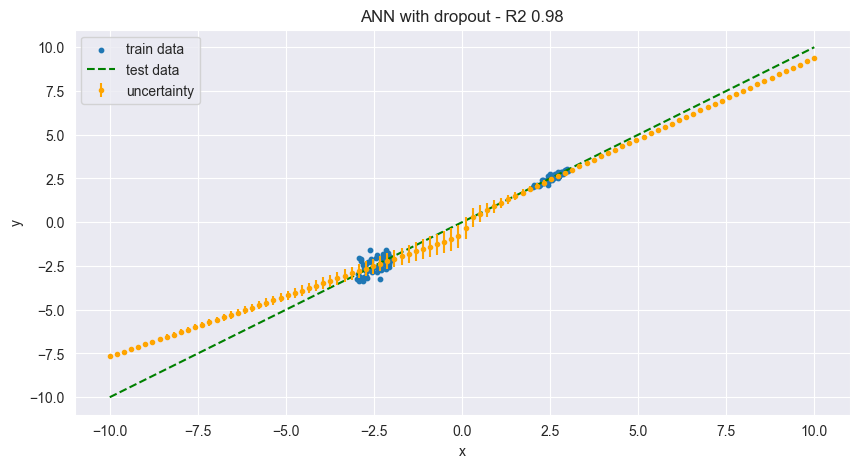

In [35]:
# function to predict on the test dataset, and the epistemic uncertainty
def predictor(model,
              X_test, T=100):
    probs = []
    for _ in range(T):
        probs += [model.predict(X_test,verbose=0)]
    return probs

# function to plot uncertainty
def plot_aleatoric_uncertainty(model, ax, title,
                     x_train=x_train, y_train=y_train,
                     x_test=np.linspace(-10,10,100), y_test=np.linspace(-10,10,100),
                     T=1):
  p = np.array(predictor(model, x_test, T=1))
  mean, epistemic_std = np.mean(p[:,:,0], axis=0), np.std(p[:,:,0], axis=0)
  aleatoric_std = np.exp(0.5*np.mean(p[:,:,1], axis=0))
  ax.plot(x_test, x_test, ls='--', label='test data', color='green')
  ax.errorbar(x_test, mean, yerr=aleatoric_std, fmt='.', label='uncertainty', color='orange')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_title('{} - R2 {:.2f}'.format(title, r2_score(y_test, mean)))
  ax.legend()

# plot aleatoric uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(x_train_reshaped, y_train_reshaped[:,0], s=10, label='train data')
plot_aleatoric_uncertainty(model_with_dropout_aleatoric, ax, 'ANN with dropout',
                           x_train_reshaped, y_train_reshaped)

We can see that the uncertainty is higher in the region on the left where our data has a higher underlying randomness.

The difference here is we use a specific loss function and then adjust the parameters of our output so it also searches for the variance computed. We do not use dropout within it.

If we look at the code however by professor then we see that they use both in tandem allowing us to capture the epistemic and aleatoric uncertainty simultaneously.

We sum the 2 to provide total variance. ASK